### Exploratory Data Analysis

In [11]:
import pandas as pd 
colleges_df = pd.read_csv('/Users/christianmoya/Documents/Flatiron/Phase_3/Phase_3_Project/colleges.csv')
colleges_df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
colleges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   school_name                           1558 non-null   object 
 1   early_career_pay                      1558 non-null   int64  
 2   mid_career_pay                        1558 non-null   int64  
 3   meaning_percentage                    1558 non-null   int64  
 4   stem_percentage                       1558 non-null   int64  
 5   engineering                           1558 non-null   bool   
 6   private_school                        1558 non-null   bool   
 7   religious                             1558 non-null   bool   
 8   art                                   1558 non-null   bool   
 9   for_sports_fans                       1558 non-null   bool   
 10  party_school                          1558 non-null   bool   
 11  liberal_arts_scho

### Target - Over $60,000

We'll be looking at whether schools have an expected income of over 60,000. We'll be taking the early career expected income column, which is currently continuous, and creating a new column of booleans that signify whether the value is over 60,000 or not. 

In [78]:
colleges_df['over_60000'] = colleges_df['early_career_pay'] >= 60000

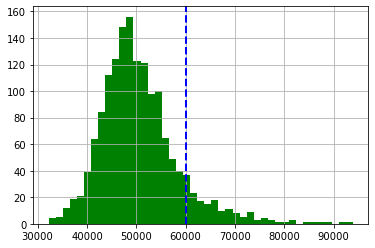

In [74]:
colleges_df['early_career_pay'].hist(bins='auto', color='green')
plt.axvline(60000, color='blue', linestyle='dashed', linewidth=2);

False    0.897946
True     0.102054
Name: over_60000, dtype: float64

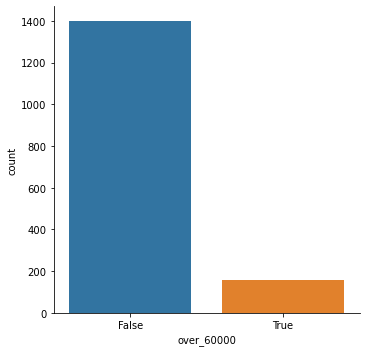

In [87]:
import seaborn as sns
sns.color_palette('Greens_d')
sns.catplot(x='over_60000', kind='count', data=colleges_df)
sns.color_palette('bright')
colleges_df['over_60000'].value_counts('percentile')

Although many college students expect a salary of $60,000 after graduating, we find that only 10% of schools meet that expectation. 

### Features

We'll be looking at a number of features, some of which have a lot of overlap. Those features include tuition (in-state, out-of-state, totals for both, and room and board. We also look at enrollment for minority groups. Next, we'll look into the type of school (12 types). Lastly, we'll look at whether alumni indicated whether their job has meaning, and the percent of STEM degrees conferred. 

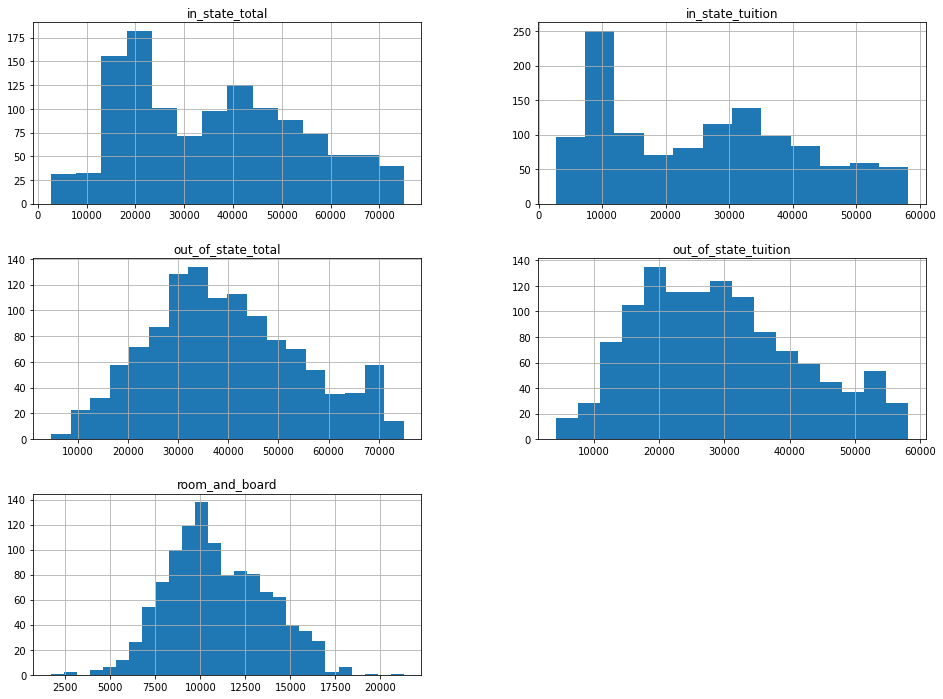

In [68]:
# Visualize continuous variables 
tuition = ['room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total']
colleges_df[tuition].hist(figsize=[16,12], bins='auto');

In state tuition seems to follow a bimodal distribution, while out of state tuition is relatively normal, but with some outliers on the right side. Room and board also follows a normal distribution. 

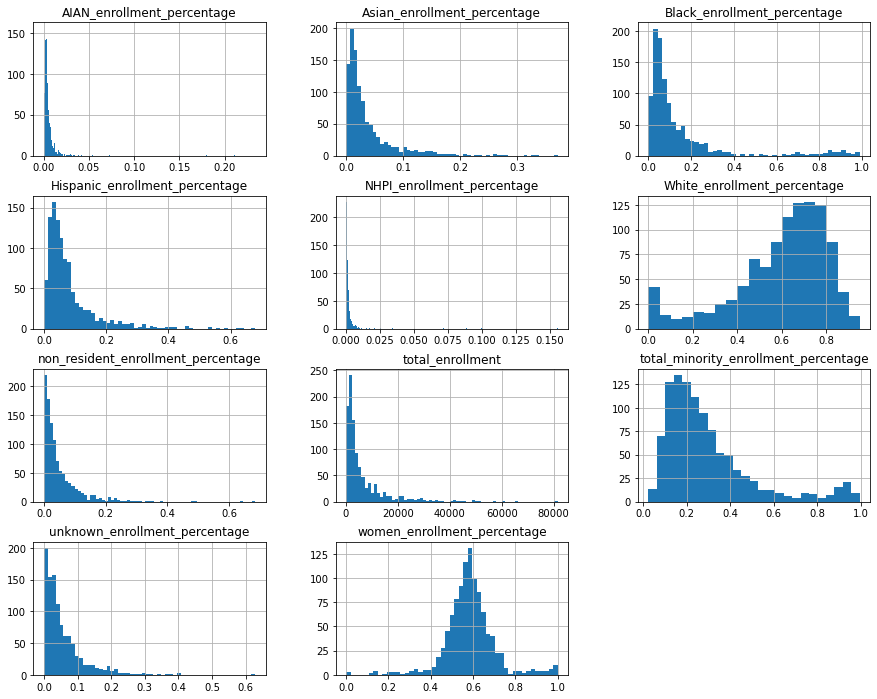

In [70]:
enrollment = ['total_enrollment', 'AIAN_enrollment_percentage', 'Asian_enrollment_percentage', 'Black_enrollment_percentage','Hispanic_enrollment_percentage', 'NHPI_enrollment_percentage', 'non_resident_enrollment_percentage', 'total_minority_enrollment_percentage', 'unknown_enrollment_percentage', 'White_enrollment_percentage', 'women_enrollment_percentage']
colleges_df[enrollment].hist(figsize=[15,12], bins='auto');

Enrollment for minority groups have a positively skewed distribution, centered at less than 20% for each minority group, while White enrollment has a negatively skewed distribution, centered at around 70%. Enrollment for women follow a normal distribution. 

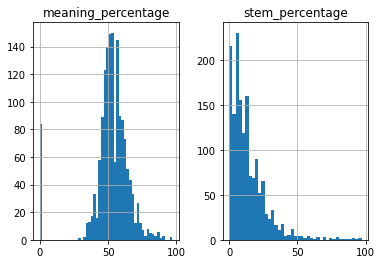

In [72]:
other_cat_features = ['meaning_percentage', 'stem_percentage']
colleges_df[other_cat_features].hist(bins='auto');

In [88]:
colleges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   school_name                           1558 non-null   object 
 1   early_career_pay                      1558 non-null   int64  
 2   mid_career_pay                        1558 non-null   int64  
 3   meaning_percentage                    1558 non-null   int64  
 4   stem_percentage                       1558 non-null   int64  
 5   engineering                           1558 non-null   bool   
 6   private_school                        1558 non-null   bool   
 7   religious                             1558 non-null   bool   
 8   art                                   1558 non-null   bool   
 9   for_sports_fans                       1558 non-null   bool   
 10  party_school                          1558 non-null   bool   
 11  liberal_arts_scho

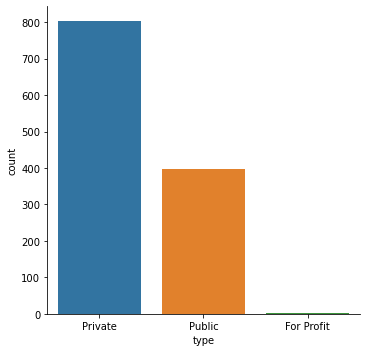

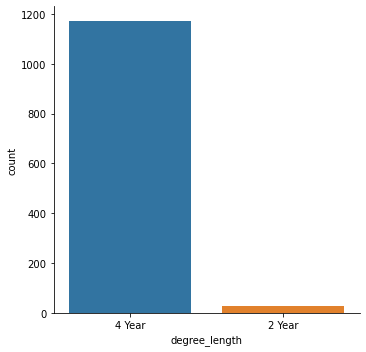

In [62]:
# Visualize categorical variable 
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='type', kind='count', data=colleges_df)
sns.catplot(x='degree_length', kind='count', data=colleges_df)

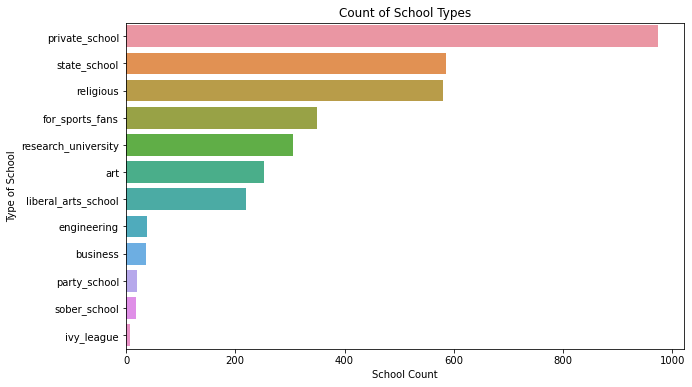

In [61]:
# Count and visualize school types
school_types = ['engineering', 'private_school', 'religious', 'art', 'for_sports_fans', 'party_school', 'liberal_arts_school', 'state_school', 'research_university','business', 'sober_school', 'ivy_league']
type_count = []
for t in school_types:
    num_of_type = colleges_df[t].sum()
    type_count.append(num_of_type)
type_count_df = pd.DataFrame({'type': school_types, 'type_count': type_count})

plt.figure(figsize=(10,6))
sns.barplot(x='type_count', 
            y='type', 
            data=type_count_df, 
            order=type_count_df.sort_values('type_count', ascending=False).type);
plt.xlabel('School Count')
plt.ylabel('Type of School')
plt.title('Count of School Types');

### Preparing the Data